In [ ]:
import numpy as np

data = np.load("feature_matrix.npy")
print(data)

[[7.46000000e+02 2.00000000e+00 1.10000000e+01 ... 3.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.00500000e+03 0.00000000e+00 5.00000000e+00 ... 3.00000000e+00
  2.15000000e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.00000000e+00
  4.10000000e+00 3.06122449e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.31300000e+03 ... 3.00000000e+00
  1.00000000e+02 1.90899184e+02]
 [0.00000000e+00 0.00000000e+00 1.30200000e+03 ... 3.00000000e+00
  1.00000000e+02 1.91836735e+02]
 [0.00000000e+00 0.00000000e+00 1.32400000e+03 ... 3.00000000e+00
  1.00000000e+02 2.41836735e+02]]


In [ ]:
data.shape

(10, 373)

In [ ]:
random_choice = np.random.choice([0, 1])
print(random_choice)

0


In [ ]:
def gen_random_based_on_data(data):
    return np.random.uniform(0, np.max(data), data.shape)

gen_random_based_on_data(data).shape

(10, 373)

In [ ]:
import random

random.seed(42)

malware = [(data, 1) for _ in range(100)]
print(len(malware))
benign = [(gen_random_based_on_data(data), np.random.choice([0, 1])) for _ in range(1000)]
print(len(benign))

datapool = malware + benign
random.shuffle(datapool)
print(datapool)
print(len(datapool))

Streaming output truncated to the last 5000 lines.
       ...,
       [8523.79983513, 5112.4838514 , 5099.57338996, ..., 1423.19066489,
        9215.50828909, 8058.93353052],
       [9111.1325492 , 4338.5995529 , 2457.74179575, ..., 4417.1476758 ,
        8904.17362019, 2139.03966819],
       [4964.06012897, 7380.02205134, 6792.215443  , ..., 3024.86636878,
        5390.33603886, 3666.89564989]]), 1), (array([[ 438.22625505, 7951.11509558, 2189.11655651, ..., 4092.95374064,
        4962.17816965, 7347.17413529],
       [2200.46583675, 9103.98496826, 7177.24587709, ..., 1093.10741454,
         527.43432551, 8205.81552299],
       [2829.8630518 ,  848.65150004, 6251.15845427, ..., 2757.35056819,
        4811.32557675, 5665.47703669],
       ...,
       [9272.91914299,  276.79707689, 5365.13799972, ..., 3775.22068013,
        4809.75460913,  403.02220767],
       [6867.14883291, 7811.27075427, 7162.25113113, ..., 8200.19058589,
        6845.0890217 , 3005.94466045],
       [5939.90690855,

In [ ]:
# trian test split
from sklearn.model_selection import train_test_split

X = np.array([pair[0].flatten() for pair in datapool])
y = np.array([pair[1] for pair in datapool])

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)

(1100, 3730)
(1100,)
(770, 3730)


In [56]:
print(len('00ae07c9fe63b080181b8a6d59c6b3b6f9913938858829e5a42ab90fb72edf7a'))

64


In [57]:
import os

malware_files = []
benign_files = []

parent_directory = "."
for item in os.listdir(parent_directory):
    item_path = os.path.join(parent_directory, item)
    if os.path.isfile(item_path):
      if len(item_path) > 52:
        malware_files.append(item_path)
      else:
        benign_files.append(item_path)
      print(f"file: {item_path}")

print(malware_files)
print(benign_files)

file: ./1962e68fb660852b0646ce054c0ee5a4836d20ed69e45b6c51655ecd73624a8f.npy
file: ./1736d6feaa80ee3c7d072a6db7ae5e7ee63c1a10314e46ab46b1a2477063de60.npy
file: ./addgroup.npy
file: ./makemime.npy
file: ./edff1edfc410a5f4509d09c1264ce53236096f89231d415edbe6326e4e8d3fa3.npy
file: ./pscan.npy
file: ./sh_is_ash.npy
file: ./nologin.npy
file: ./test2.npy
file: ./9f3d629825437af5eac0d4f4f0654f0e82266478e51f8982590646c8d62f9ea4.npy
file: ./mesg.npy
file: ./3cdfdcea9f822713661fa8d22743588c04a36746b4b05a55f2504aa7e3229d89.npy
file: ./ubiupdatevol.npy
file: ./251816206c8dd1eeac7af43ab58bf298cdc11e86cc409a091cedd6d67d2703e7.npy
file: ./e4f7493d850ccf8d6e971b477f6fd57d9af57a0ff8d39ea49731d2124c8f506b.npy
file: ./3993bc5c3cdfe470fab6f6b932a7e741630f0212a7f18249a61123e3b324edef.npy
file: ./dfc4593c221d335a40303d18471e134cbff192cc2334d670f6eede42c02c1384.npy
file: ./b2617562e8abe0ed490725e51626cb5330d4e1c8a9b128e30958732bd96a77a8.npy
file: ./26f7afa338d915ede8af149e890f5e87006231a5de096227a5197a9c3cda

In [58]:
import numpy as np

malware_numpy_X = []
malware_numpy_y = []
benign_numpy_X = []
benign_numpy_y = []

for m in malware_files:
  malware_numpy_X.append(np.load(m))
  malware_numpy_y.append(1)

for b in benign_files:
  benign_numpy_X.append(np.load(b))
  benign_numpy_y.append(0)


In [59]:
# do train test split for malware / benign

from sklearn.model_selection import train_test_split

X_train_malware, X_test_malware, y_train_malware, y_test_malware = train_test_split(malware_numpy_X, malware_numpy_y, test_size=0.3, random_state=42)
X_train_benign, X_test_benign, y_train_benign, y_test_benign = train_test_split(benign_numpy_X, benign_numpy_y, test_size=0.3, random_state=42)


X_train = X_train_malware + X_train_benign
y_train = y_train_malware + y_train_benign
X_test = X_test_malware + X_test_benign
y_test = y_test_malware + y_test_benign


In [60]:
# kNN
# TODO

In [61]:
# flatten for rf

X_train_flat = np.array([x.flatten() for x in X_train])
X_test_flat = np.array([x.flatten() for x in X_test])

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_flat, y_train)

y_pred = rf_classifier.predict(X_test_flat)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.967479674796748


In [63]:
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_flat, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.980729310186461


In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_flat)

# Test set performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Set Accuracy: 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       120
           1       0.95      0.98      0.96       126

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246


Confusion Matrix:
[[113   7]
 [  2 124]]


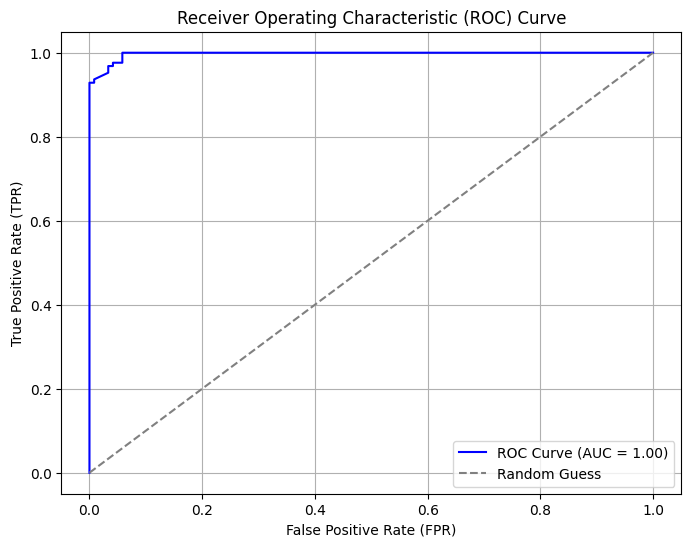

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# roc grpah
y_pred_prob = best_model.predict_proba(X_test_flat)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [66]:
# LSTM
import torch

X_train_t = torch.tensor(np.array(X_train), dtype=torch.float32)
y_train_t = torch.tensor(np.array(y_train), dtype=torch.float32)

X_test_t = torch.tensor(np.array(X_test), dtype=torch.float32)
y_test_t = torch.tensor(np.array(y_test), dtype=torch.float32)


print(X_train_t.size())
print(y_train_t.size())
print(X_test_t.size())
print(y_test_t.size())

torch.Size([571, 10, 373])
torch.Size([571])
torch.Size([246, 10, 373])
torch.Size([246])


In [90]:
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial hidden state
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Fully connected layer (only last time step)
        out = self.sigmoid(out)  # Sigmoid activation for binary classification
        return out

input_size = 373
hidden_size = 128
num_layers = 4
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 20
batch_size = 32

losses = []

for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train_t.size(0))

    for i in range(0, X_train_t.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_t[indices], y_train_t[indices]

        # Forward pass
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    losses.append(loss.item())

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t).squeeze()
    y_pred_binary = (y_pred > 0.5).float()

# Calculate accuracy
accuracy = (y_pred_binary == y_test_t).float().mean()
print(f"Test Accuracy: {accuracy:.4f}")

Epoch [1/20], Loss: 0.6881
Epoch [2/20], Loss: 0.6894
Epoch [3/20], Loss: 0.6913
Epoch [4/20], Loss: 0.6843
Epoch [5/20], Loss: 0.6595
Epoch [6/20], Loss: 0.4180
Epoch [7/20], Loss: 0.5768
Epoch [8/20], Loss: 0.2182
Epoch [9/20], Loss: 0.0596
Epoch [10/20], Loss: 0.1625
Epoch [11/20], Loss: 0.2862
Epoch [12/20], Loss: 0.0166
Epoch [13/20], Loss: 0.1993
Epoch [14/20], Loss: 0.1084
Epoch [15/20], Loss: 0.0259
Epoch [16/20], Loss: 0.0321
Epoch [17/20], Loss: 0.0421
Epoch [18/20], Loss: 0.1431
Epoch [19/20], Loss: 0.0076
Epoch [20/20], Loss: 0.0478
Test Accuracy: 0.9431


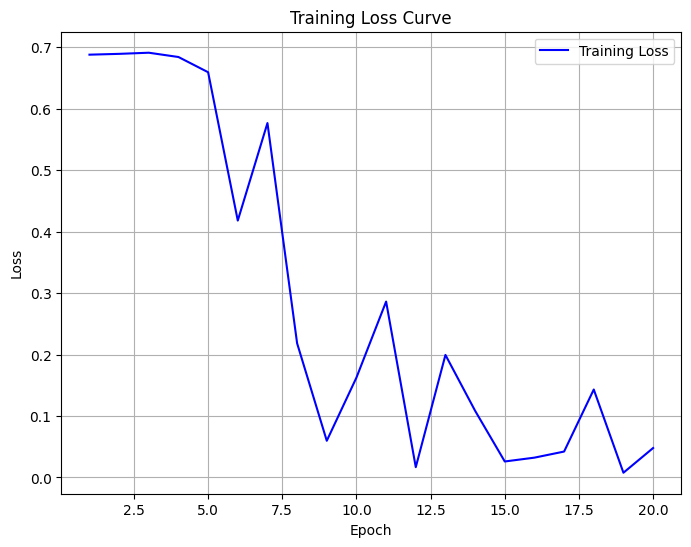

In [91]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), losses, color='blue', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Metrics calculations
# True Positives, False Positives, True Negatives, False Negatives
TP = ((y_pred_binary == 1) & (y_test_t == 1)).sum().item()
FP = ((y_pred_binary == 1) & (y_test_t == 0)).sum().item()
TN = ((y_pred_binary == 0) & (y_test_t == 0)).sum().item()
FN = ((y_pred_binary == 0) & (y_test_t == 1)).sum().item()

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

# Recall (Sensitivity)
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

# F1 Score
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# Confusion Matrix
confusion_matrix = torch.tensor([[TN, FP], [FN, TP]])

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix}")

Test Accuracy: 0.9431
Precision: 0.9444
Recall: 0.9444
F1 Score: 0.9444
Confusion Matrix:
tensor([[113,   7],
        [  7, 119]])


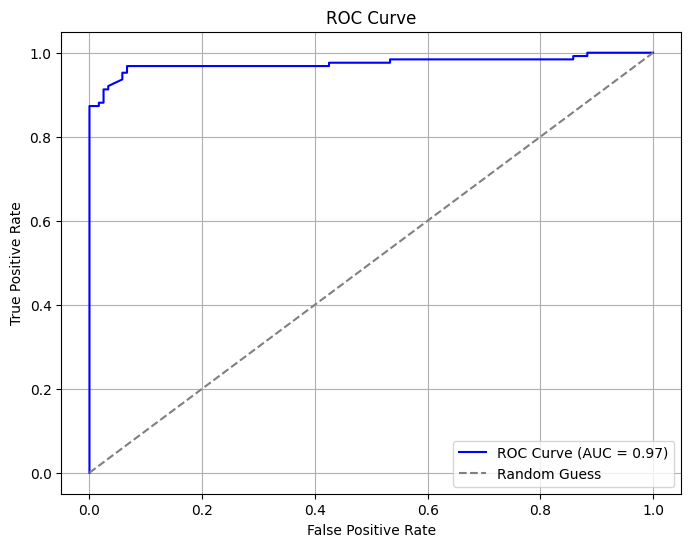

In [93]:
y_test_np = y_test_t.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_np)
roc_auc = roc_auc_score(y_test_np, y_pred_np)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [75]:
# non-cpu values (drop last two columns)

data = np.load("00ae07c9fe63b080181b8a6d59c6b3b6f9913938858829e5a42ab90fb72edf7a.npy")
print(data)

print(data.shape)

new_data = data[:, :-2]
print(new_data)
print(new_data.shape)

[[7. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 373)
[[7. 4. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10, 371)


In [76]:
X_train_no_cpu = [x[:, :-2] for x in X_train]
X_test_no_cpu = [x[:, :-2] for x in X_test]

print(len(X_train_no_cpu))
print(X_train_no_cpu[0].shape)

571
(10, 371)


In [77]:
# flatten for rf

X_train_no_cpu_flat = np.array([x.flatten() for x in X_train_no_cpu])
X_test_no_cpu_flat = np.array([x.flatten() for x in X_test_no_cpu])

In [78]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_no_cpu_flat, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9807384954532928


In [79]:
from sklearn.metrics import confusion_matrix

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_no_cpu_flat)

# Test set performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Set Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Test Set Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       120
           1       0.95      0.99      0.97       126

    accuracy                           0.97       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.97      0.97      0.97       246


Confusion Matrix:
[[113   7]
 [  1 125]]


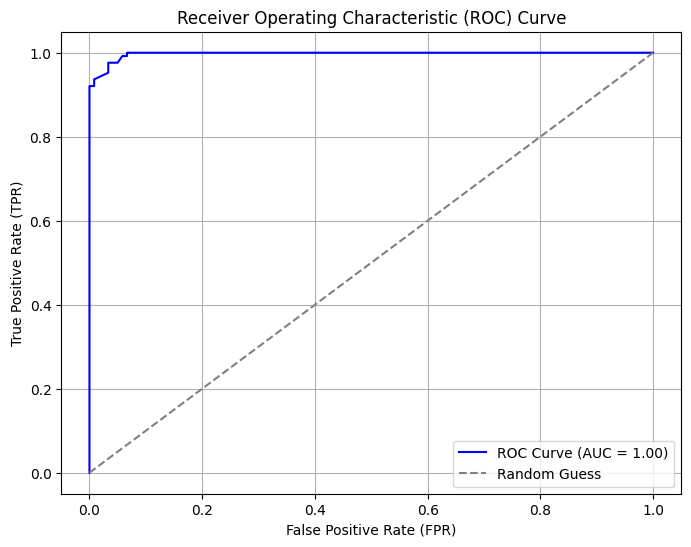

In [80]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# roc grpah
y_pred_prob = best_model.predict_proba(X_test_no_cpu_flat)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

In [81]:
# LSTM (non-cpu)
import torch

X_train_t_no_cpu = torch.tensor(np.array(X_train_no_cpu), dtype=torch.float32)
y_train_t = torch.tensor(np.array(y_train), dtype=torch.float32)

X_test_t_no_cpu = torch.tensor(np.array(X_test_no_cpu), dtype=torch.float32)
y_test_t = torch.tensor(np.array(y_test), dtype=torch.float32)


print(X_train_t_no_cpu.size())
print(y_train_t.size())
print(X_test_t_no_cpu.size())
print(y_test_t.size())

torch.Size([571, 10, 371])
torch.Size([571])
torch.Size([246, 10, 371])
torch.Size([246])


In [83]:
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.2)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial hidden state
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))  # LSTM forward pass
        out = self.fc(out[:, -1, :])  # Fully connected layer (only last time step)
        out = self.sigmoid(out)  # Sigmoid activation for binary classification
        return out

input_size = 371
hidden_size = 128
num_layers = 4
output_size = 1

model = LSTMModel(input_size, hidden_size, num_layers, output_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)

num_epochs = 20
batch_size = 32

losses = []

for epoch in range(num_epochs):
    model.train()
    permutation = torch.randperm(X_train_t_no_cpu.size(0))

    for i in range(0, X_train_t_no_cpu.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_t_no_cpu[indices], y_train_t[indices]

        # Forward pass
        outputs = model(batch_x).squeeze()
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    losses.append(loss.item())

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t_no_cpu).squeeze()
    y_pred_binary = (y_pred > 0.5).float()

# Calculate accuracy
accuracy = (y_pred_binary == y_test_t).float().mean()
print(f"Test Accuracy: {accuracy:.4f}")

Epoch [1/20], Loss: 0.6936
Epoch [2/20], Loss: 0.6928
Epoch [3/20], Loss: 0.6914
Epoch [4/20], Loss: 0.6812
Epoch [5/20], Loss: 0.6856
Epoch [6/20], Loss: 0.4595
Epoch [7/20], Loss: 0.3772
Epoch [8/20], Loss: 0.2440
Epoch [9/20], Loss: 0.1412
Epoch [10/20], Loss: 0.1483
Epoch [11/20], Loss: 0.1425
Epoch [12/20], Loss: 0.0313
Epoch [13/20], Loss: 0.1855
Epoch [14/20], Loss: 0.0322
Epoch [15/20], Loss: 0.0172
Epoch [16/20], Loss: 0.0107
Epoch [17/20], Loss: 0.1030
Epoch [18/20], Loss: 0.0104
Epoch [19/20], Loss: 0.0494
Epoch [20/20], Loss: 0.1898
Test Accuracy: 0.9350


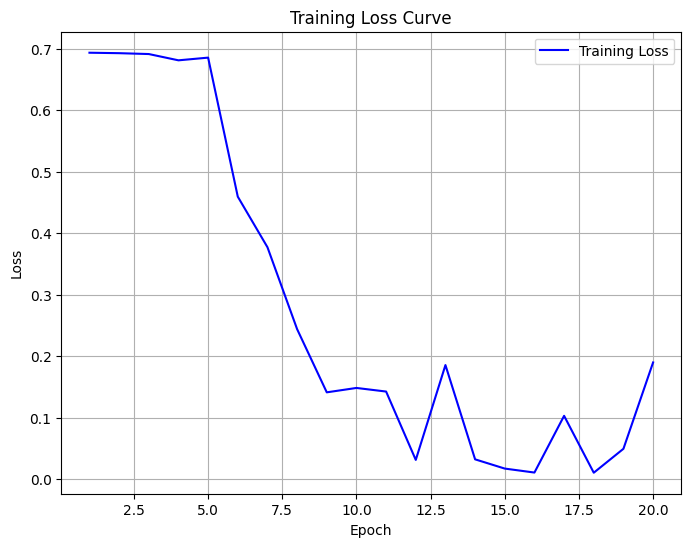

In [89]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid()
plt.show()

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Metrics calculations
# True Positives, False Positives, True Negatives, False Negatives
TP = ((y_pred_binary == 1) & (y_test_t == 1)).sum().item()
FP = ((y_pred_binary == 1) & (y_test_t == 0)).sum().item()
TN = ((y_pred_binary == 0) & (y_test_t == 0)).sum().item()
FN = ((y_pred_binary == 0) & (y_test_t == 1)).sum().item()

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision
precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

# Recall (Sensitivity)
recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

# F1 Score
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

# Confusion Matrix
confusion_matrix = torch.tensor([[TN, FP], [FN, TP]])

# Print metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix}")

Test Accuracy: 0.9350
Precision: 0.9365
Recall: 0.9365
F1 Score: 0.9365
Confusion Matrix:
tensor([[112,   8],
        [  8, 118]])


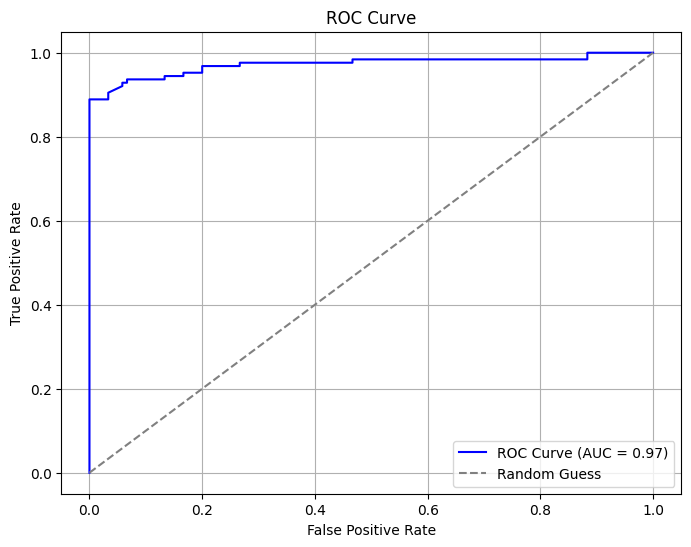

In [86]:
y_test_np = y_test_t.cpu().numpy()
y_pred_np = y_pred.cpu().numpy()

fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_np)
roc_auc = roc_auc_score(y_test_np, y_pred_np)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()